# <p style="text-align: center;">EE 381V: Statistical Machine Learning</p>
# <p style="text-align: center;">Homework 1: Programming Assignments</p>
## <p style="text-align: center;">Total points: 65  </p>
## <p style="text-align: center;">Due: Feb 16 by 11:59 pm (submission via Gradescope)</p>

Ideally, your solution to the assignments should be written in and submitted as a **Jupyter notebook**. Please make sure your code runs and the graphics (along with anything else that you want to be considered) are displayed in your notebook before submitting.

As a general practice, in case of theretical questions (e.g., computation of gradients), the most convenient way of providing an answer is to type it in the provided spaces (markdown cells) using LaTeX (if not familiar with LaTeX, please check the markdown cells below stating questions for examples of writing equations in LaTeX). Alternatively, you could write down the solution on paper and submit a pdf file of the scan/photo.

# <font color='blue'> Problem 3: Perceptron (20 pts) </font>

## Download data
In this problem, we will use the Iris flower dataset https://www.kaggle.com/arshid/iris-flower-dataset. This dataset contains 4 features (Petal Length, Petal Width, Sepal Length, Sepal Width) that characterize flowers and classify them as belonging to one of 3 classes. For the sake of simplicity of this exercise, we strip the last 100 rows of the dataset so as to exclude the class ‘Iris-virginica’, and proceed by using only 2 classes: ‘Iris-setosa’ and ‘Iris-versicolor’.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    print(data)
    
    # filter out one class of the dataset and take the last 100 rows
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data

data = load_data()

X = data[:, :-1]
y = data[:, -1]
y = np.asarray(y).ravel() # matrix to array
X = np.asarray(X)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


## (a) Visualize data (5 pts)
Plot the data with 2-D scatter (see an example below), using different colors to represent points in different classes.

1. Y: petal length, X: sepal length; 

2. Y: petal width, X: sepal width; 

3. Y: petal length, X: petal width; 

4. Y: sepal length, X: sepal width.

## Example:

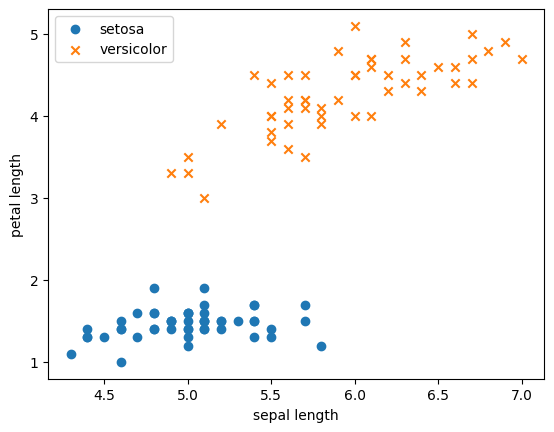

In [3]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.ylabel('petal length')
plt.xlabel('sepal length')
plt.legend()
plt.show()

## Your turn: Please show other scatter plots:

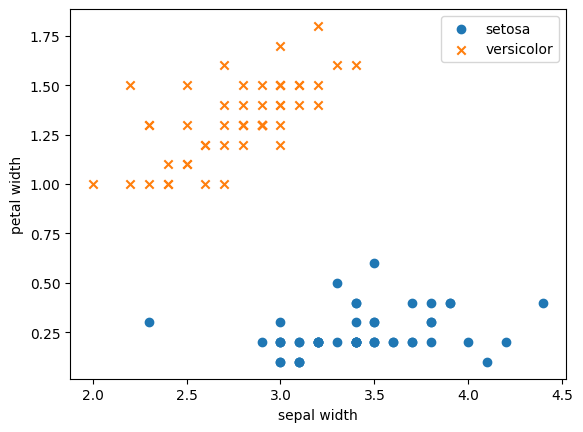

In [4]:
#Petal Length, Petal Width, Sepal Length, Sepal Width
plt.scatter(np.array(data[:50,1]), np.array(data[:50,3]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,1]), np.array(data[50:,3]), marker='x', label='versicolor')
plt.ylabel('petal width')
plt.xlabel('sepal width')
plt.legend()
plt.show()

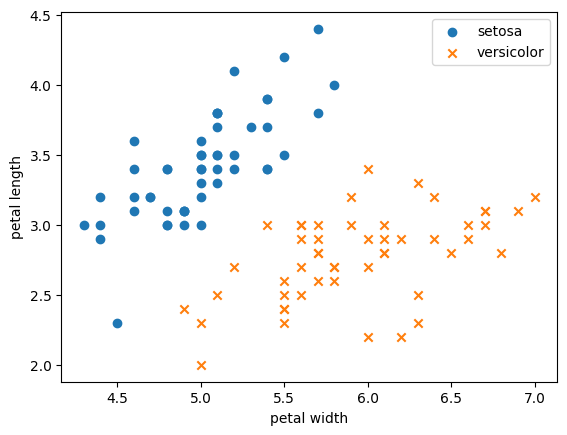

In [5]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,1]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,1]), marker='x', label='versicolor')
plt.ylabel('petal length')
plt.xlabel('petal width')
plt.legend()
plt.show()

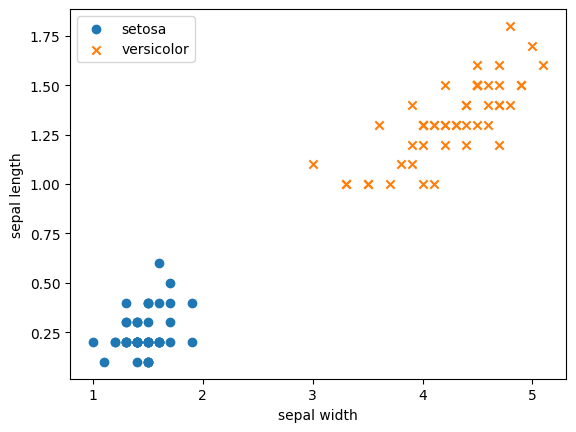

In [6]:
plt.scatter(np.array(data[:50,2]), np.array(data[:50,3]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,2]), np.array(data[50:,3]), marker='x', label='versicolor')
plt.ylabel('sepal length')
plt.xlabel('sepal width')
plt.legend()
plt.show()

## (b) Program the Perceptron algorithm (8 pts)

In [7]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

In [8]:
def perceptron(data, num_iter):

    # Define learning rate and number of epochs
    lr = 0.5
    epochs = num_iter
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape

    # Initializing parameters (theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n + 1, 1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Inserting 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)

            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)

                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
    
    # Plot decision boundary and close plot
    plot_decision_boundary(X, theta)
    plt.close()
    print(n_miss_list)
        
    return theta, n_miss_list


In [9]:
def plot_decision_boundary(X, theta, frac_miss_list=None):
    # X --> Inputs

    # Plot decision boundary code...

    if frac_miss_list is not None:
        # Plot fraction of misclassified points vs. iterations
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(frac_miss_list) + 1), frac_miss_list, marker='o', linestyle='-')
        plt.xlabel('Iterations')
        plt.ylabel('Fraction of Misclassified Points')
        plt.title('Fraction of Misclassified Points vs. Iterations')

In [10]:
num_iter = 7
w, misclassified_ = perceptron(data, num_iter)

[1, 3, 1, 0, 0, 0, 0]


## (c) Plot the fraction of misclassified points  vs. iterations (4 pts)

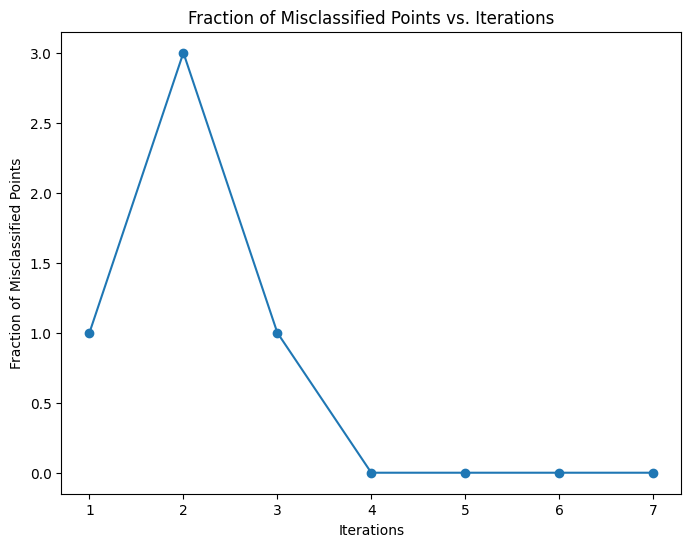

In [11]:
plot_decision_boundary(X, w, misclassified_)

## (d) Limitation (3 pts)
Write down what you think are the limitation of the Perceptron Learning Algorithm.

- Only capable of linear seperations, which may not be useful for more complex types of classification
- Only capable of binary classification

# <font color='blue'> Problem 4: Linear Regression (20 pts) </font>

In this problem, we will use linear regression to predict house prices. The data (which we will load as a pandas dataframe) is in Housing.csv file that you can download from Canvas.

## Import standard libraries and load data

In [12]:
# from google.colab import files
# uploaded = files.upload()

# supress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# data visualization:
import matplotlib.pyplot as plt 
import seaborn as sns

# load data
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

## (a) Data exploration (4 pts)

First, explore the data and generate its descriptive statistics. [Hint: showing housing.head(), housing.info() and housing.describe() may be helpful. More on pandas.DataFrame can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html.] 

Are any data entries missing, i.e., do we have to perform data imputation? Note that missing data (null values) in pandas datasets are represented by 'None' and 'nan' data types. [Hint: *housing.isnull()* implements a mask where null values are flagged as 'True' or '1', while rest of the entries are labeled as '0'; the number of missing values for each column (features) is given by *housing.isnull().sum()* where *.sum()* implements a columnwise sum.]

In [13]:
print("Head: ")
print(housing.head())

print("Info: ")
print(housing.info())

print("Description: ")
print(housing.describe())

print("Number of null values per feature: ")
print(housing.isnull().sum())

#there seem to be no missing data entries


Head: 
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns 

## (b) Data visualization (4 pts)

Use sns.pairplot(housing) to plot pairwise relationships between numerical data in the set (see https://seaborn.pydata.org/generated/seaborn.pairplot.html for more details). Which variable seems to be the most correlated with price?

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


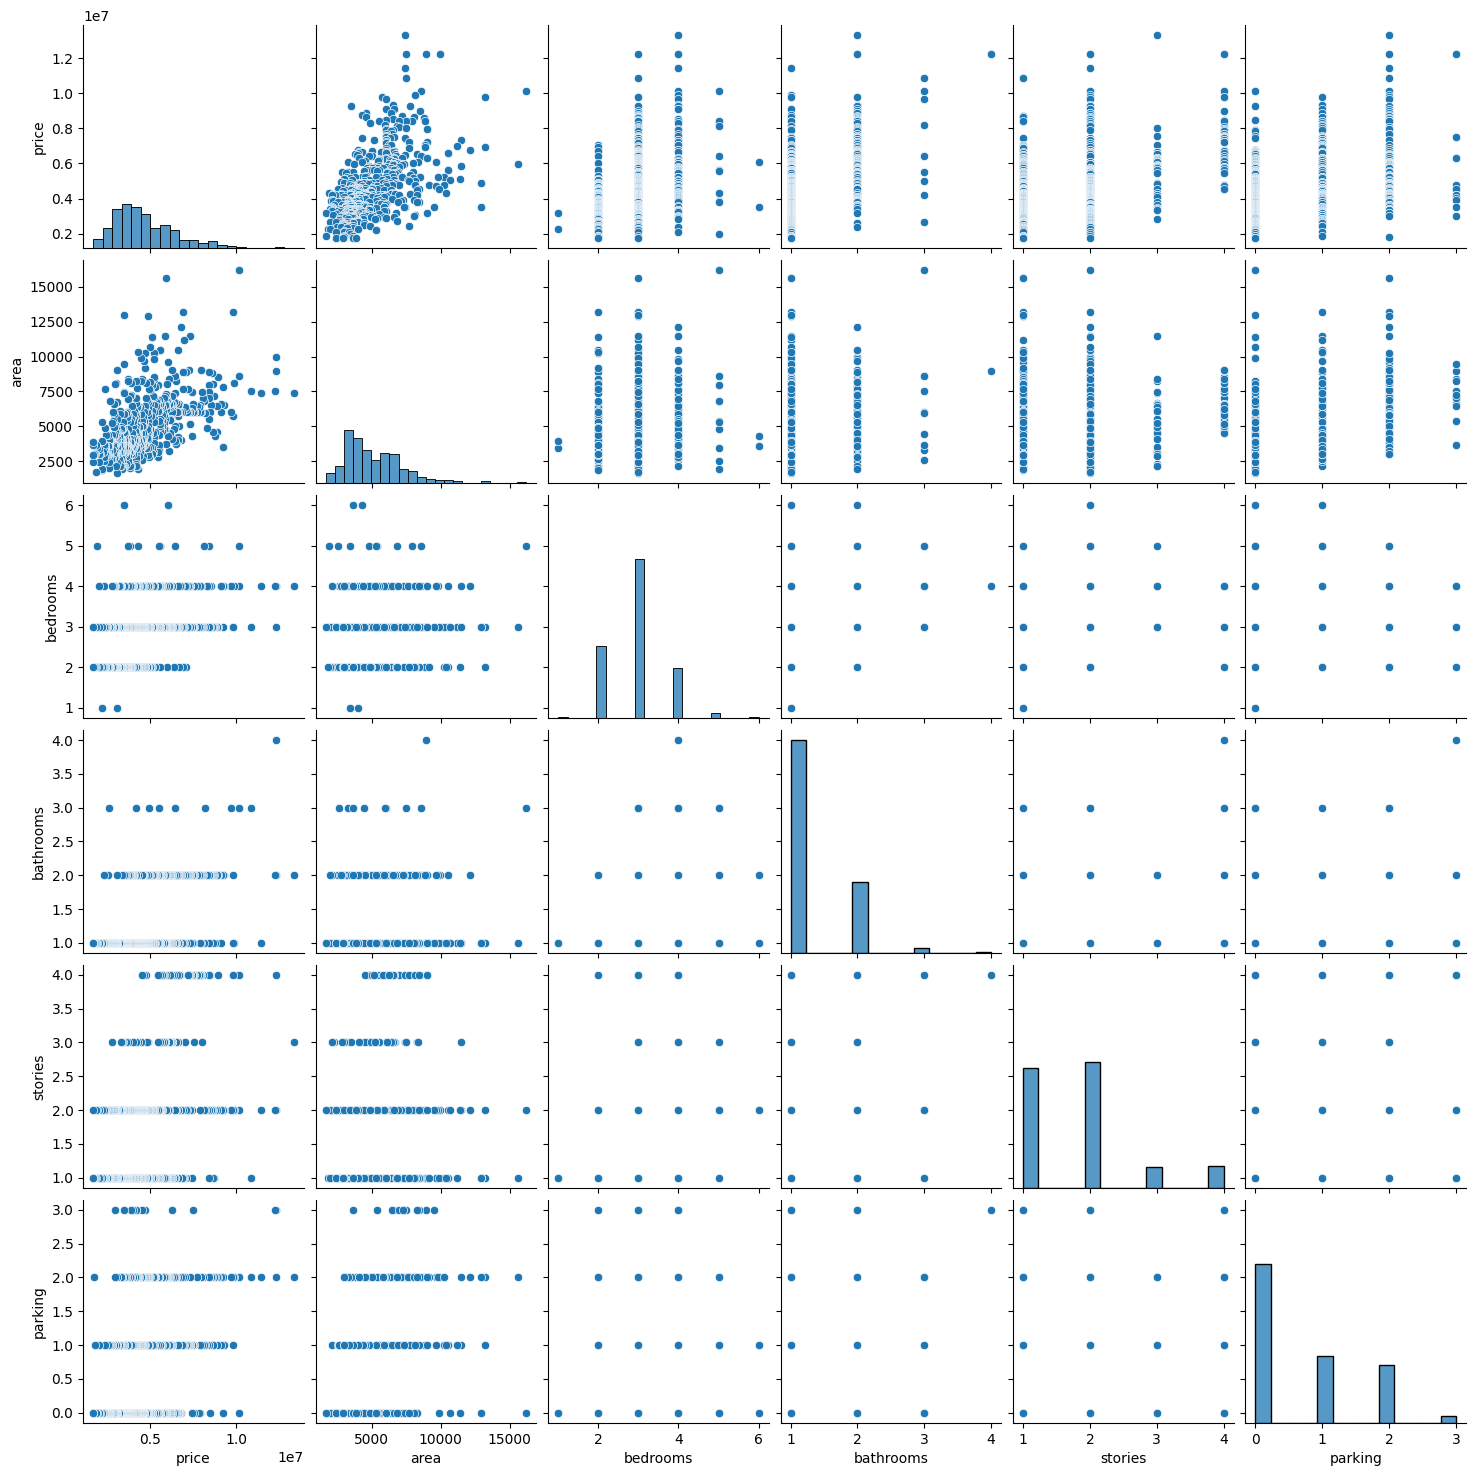

In [14]:
# Plot relationships
sns.pairplot(housing)

# Select only the numerical columns
numerical_columns = housing.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation coefficients
correlation_coefficients = numerical_columns.corr()['price'].sort_values(ascending=False)

# Display the correlation coefficients
print(correlation_coefficients)

# Price is most correlated with area with a correlation coefficient of 0.54


## Additional proceesing: Transforming categorical variables to numerical ones
To solve linear regression, we need to convert categorical variables into numerical form. This is what the code below will do for you.

In [15]:
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Define the map function for binary variables
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Apply the binary_map function to binary variables
housing[varlist[:-1]] = housing[varlist[:-1]].apply(binary_map)

# Define the map function for the 'furnishingstatus' variable
def furnishing_map(x):
    return {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}[x]

# Apply the furnishing_map function to the 'furnishingstatus' column
housing['furnishingstatus'] = housing['furnishingstatus'].apply(furnishing_map)


## More additional processing: Separating data from its labels/values, conversion to numpy

Another tidbit that is already coded. Y denotes the price, X is the data matrix. Conversion to numpy arrays is done using *.to_numpy()* function. 

In [16]:
Y=housing['price'].to_numpy() 
X=housing.drop('price',axis=1).to_numpy()

# Augment $X$ with a column of all ones (facilitating bias term):
X=np.hstack((np.ones((np.shape(X)[0],1)),X))

## (c) Split data into training and testing sets (2 pts)

Look up the train test split function at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html to obtain X_train, X_test, Y_train, Y_test ($80 \%$ of the overall data is to be used for training).

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## (d) Perform regression (6 pts)

In class we derived the formula for one-shot learning of the weight vector w that minimizes the mean-square error of the linear fit to data. Implement/program that procedure below and print the resulting w, along with the mean-square errors on both training and testing data.

Hints: *np.matmul()* can be used to perform matrix multiplication. Transpose of an array is found as *.T*, e.g., *X_train.T* . Matrix inverse can be implemented using *np.linalg.inv()*. Finally, if A and B are two numpy arrays, then $||A-B||_2$ can be obtained by *np.sqrt(sum((A-B)**2)/np.shape(A)[0])*.

In [18]:
# get pseudo inverse of matrix X
X_inverse = np.matmul(np.linalg.inv((np.matmul(X_train.T, X_train))), X_train.T)

# get set of weights
weights = np.matmul(X_inverse, y_train)

## (e) Plot and analyze the results (4 pts)

Use plt.scatter (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to obtain a scatter plot for predicted price against true price for both training and testing data on the same plot.  Furthermore, use *np.corrcoef()* https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html  and state the correlation coefficient between the predicted price and true price for train and validation sets. Comment on the performance of the model based on the scatter plot and the correlation coefficient.

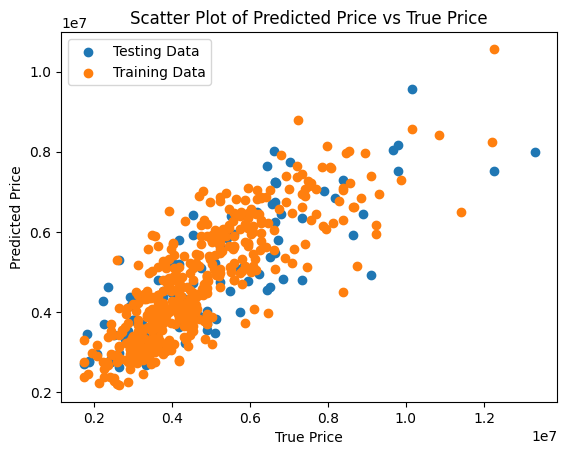

Correlation coefficient for training data: 0.8279148188578206
Correlation coefficient for testing data: 0.8183895476061005


In [19]:
# Get output predictions for testing data
y_test_pred = np.matmul(X_test, weights)

# Get output predictions for training data
y_train_pred = np.matmul(X_train, weights)

# Plotting scatter plot
plt.scatter(y_test, y_test_pred, label='Testing Data')
plt.scatter(y_train, y_train_pred, label='Training Data')

# Add labels and title
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Scatter Plot of Predicted Price vs True Price')
plt.legend()
plt.show()

# Calculate correlation coefficients
corr_train = np.corrcoef(y_train, y_train_pred)[0, 1]
corr_test = np.corrcoef(y_test, y_test_pred)[0, 1]

print("Correlation coefficient for training data:", corr_train)
print("Correlation coefficient for testing data:", corr_test)

# <font color='blue'> Problem 5: Logistic regression on MNIST (25 pts) </font>

In this problem, we use the MNIST dataset (https://www.kaggle.com/datasets/hojjatk/mnist-dataset) which allows us to explore real-world data while spending minimal effort on preprocessing and formatting. We will observe that parameter tuning can greatly accelerate and improve a machine learning algorithm. 

### Downloading the data (MNIST)

In [20]:
%matplotlib inline
from sklearn.datasets import fetch_openml
# Change data_home to wherever to where you want to download your data
mnist = fetch_openml('mnist_784')

Having loaded the dataset, you can complete the tasks below.

### 1. Print shapes of input images and labels. (2 pts)

In [21]:
print("Shape of input images:", mnist.data.shape)
print("Shape of labels:", mnist.target.shape)

Shape of input images: (70000, 784)
Shape of labels: (70000,)


### 2. Split data into training and test sets and print the shapes of both. The test size should be 0.25. Random state should be 0. (3 pts)

In [22]:
X = mnist.data.to_numpy()
Y = mnist.target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

### 3. Show a few images and the corresponding labels. (2 pts)

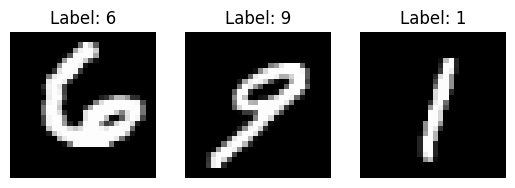

In [23]:
import matplotlib.pyplot as plt

# Define the number of images you want to display
num_images = 3

# Loop through the first few images and display them along with their labels
for i in range(num_images):
    image = X_train[i].reshape(28, 28)  # Reshape the image to its original dimensions
    label = int(y_train[i])  # Extract the label
    
    # Plot the image
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.show()

### 4. The main part of the code (12 pts)
a. Import the logistic regression model.\
b. Make an instance of the model.\
c. Train the model on data, store the information learned.\
d. Predict the labels of test data.

In [24]:
# import model
from sklearn.linear_model import LogisticRegression

#instance of model
logistic_model = LogisticRegression()

#train model
logistic_model.fit(X_train, y_train)

#predict labels
predictions = logistic_model.predict(X_test)

### 5. Print the classification report (specifically, the class-wise Precision, Recall and F1-score). More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). (3 pts)

In [25]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1715
           1       0.95      0.98      0.96      1971
           2       0.91      0.90      0.90      1786
           3       0.91      0.89      0.90      1763
           4       0.91      0.93      0.92      1676
           5       0.90      0.85      0.87      1593
           6       0.94      0.95      0.94      1710
           7       0.93      0.92      0.93      1837
           8       0.87      0.88      0.87      1713
           9       0.89      0.90      0.89      1736

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



### 6. Display examples of misclassified images with predicted labels. (3 pts)

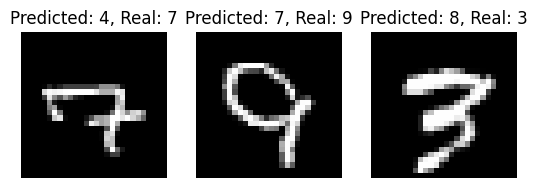

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Find misclassified images
misclassified_indices = np.where(predictions != y_test)[0]

# Define the number of misclassified images you want to display
num_misclassified_images = min(3, len(misclassified_indices))

# Loop through the misclassified images and display them along with their predicted labels
for i in range(num_misclassified_images):
    misclassified_index = misclassified_indices[i]
    misclassified_image = X_test[misclassified_index].reshape(28, 28)  # Reshape the image to its original dimensions
    predicted_label = predictions[misclassified_index]  # Extract the predicted label
    true_label = y_test[misclassified_index]  # Extract the true label
    
    # Plot the misclassified image
    plt.subplot(1, num_misclassified_images, i + 1)
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f'Predicted: {predicted_label}, Real: {true_label}')
    plt.axis('off')

plt.show()
